In [1]:
import pandas as pd

In [3]:
df == pd.read_csv('train.csv')

NameError: name 'df' is not defined

In [5]:
df = pd.read_csv('train.csv')

In [7]:
df

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold
0,1,17/01/11,8091,216418,99.0375,111.8625,0,0,20
1,2,17/01/11,8091,216419,99.0375,99.0375,0,0,28
2,3,17/01/11,8091,216425,133.9500,133.9500,0,0,19
3,4,17/01/11,8091,216233,133.9500,133.9500,0,0,44
4,5,17/01/11,8091,217390,141.0750,141.0750,0,0,52
...,...,...,...,...,...,...,...,...,...
150145,212638,09/07/13,9984,223245,235.8375,235.8375,0,0,38
150146,212639,09/07/13,9984,223153,235.8375,235.8375,0,0,30
150147,212642,09/07/13,9984,245338,357.6750,483.7875,1,1,31
150148,212643,09/07/13,9984,547934,141.7875,191.6625,0,1,12


In [9]:
df[['day', 'month', 'year']] = df['week'].str.split('/', expand=True)

In [11]:
df


,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,day,month,year
0,1,17/01/11,8091,216418,99.0375,111.8625,0,0,20,17,01,11
1,2,17/01/11,8091,216419,99.0375,99.0375,0,0,28,17,01,11
2,3,17/01/11,8091,216425,133.9500,133.9500,0,0,19,17,01,11
3,4,17/01/11,8091,216233,133.9500,133.9500,0,0,44,17,01,11
4,5,17/01/11,8091,217390,141.0750,141.0750,0,0,52,17,01,11
...,...,...,...,...,...,...,...,...,...,...,...,...
150145,212638,09/07/13,9984,223245,235.8375,235.8375,0,0,38,09,07,13
150146,212639,09/07/13,9984,223153,235.8375,235.8375,0,0,30,09,07,13
150147,212642,09/07/13,9984,245338,357.6750,483.7875,1,1,31,09,07,13
150148,212643,09/07/13,9984,547934,141.7875,191.6625,0,1,12,09,07,13


In [13]:
df = df.drop('week', axis=1)

In [15]:
df

,record_ID,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,day,month,year
0,1,8091,216418,99.0375,111.8625,0,0,20,17,01,11
1,2,8091,216419,99.0375,99.0375,0,0,28,17,01,11
2,3,8091,216425,133.9500,133.9500,0,0,19,17,01,11
3,4,8091,216233,133.9500,133.9500,0,0,44,17,01,11
4,5,8091,217390,141.0750,141.0750,0,0,52,17,01,11
...,...,...,...,...,...,...,...,...,...,...,...
150145,212638,9984,223245,235.8375,235.8375,0,0,38,09,07,13
150146,212639,9984,223153,235.8375,235.8375,0,0,30,09,07,13
150147,212642,9984,245338,357.6750,483.7875,1,1,31,09,07,13
150148,212643,9984,547934,141.7875,191.6625,0,1,12,09,07,13


In [17]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X, y = df.drop('units_sold', axis=1), df['units_sold']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [19]:
model = RandomForestRegressor(n_jobs=-1)

model.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1)

In [21]:
model.score(X_test, y_test)

0.7599790193227922

In [23]:
from sklearn.matrics import root_mean_squared_error

y_pred = model.predict(X_test)

rmse = root_mean_squared_error(y_pred, y_test)

rmse

ModuleNotFoundError: No module named 'sklearn.matrics'

In [25]:
from sklearn.metrics import root_mean_squared_error

y_pred = model.predict(X_test)

rmse = root_mean_squared_error(y_pred, y_test)

rmse

29.597212188436586

In [27]:
df.units_sold.describe()

count    150150.000000
mean         51.674206
std          60.207904
min           1.000000
25%          20.000000
50%          35.000000
75%          62.000000
max        2876.000000
Name: units_sold, dtype: float64

Matplotlib is building the font cache; this may take a moment.


<Axes: >

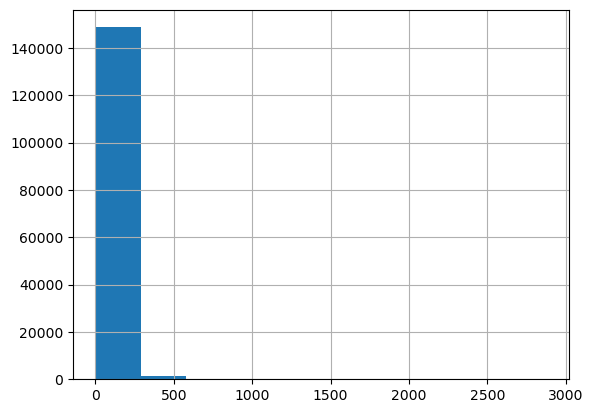

In [29]:
df.units_sold.hist()

AttributeError: module 'numpy' has no attribute 'linespace'

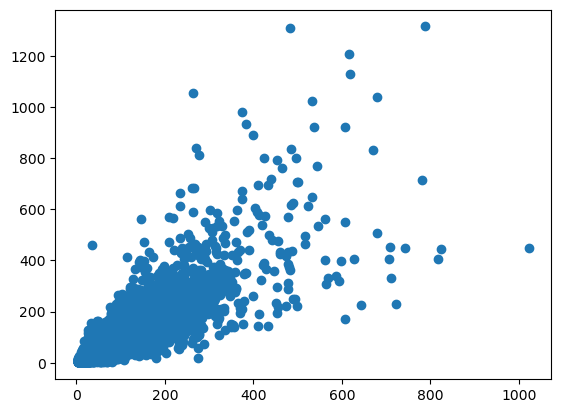

In [31]:
import numpy as np

import matplotlib.pyplot as plt

plt.scatter(y_pred, y_test)

plt.plot(np.linespace(y_pred.min(), y_pred.max()), np.linespace(y_test.min(), y_test.max()), color = 'red')

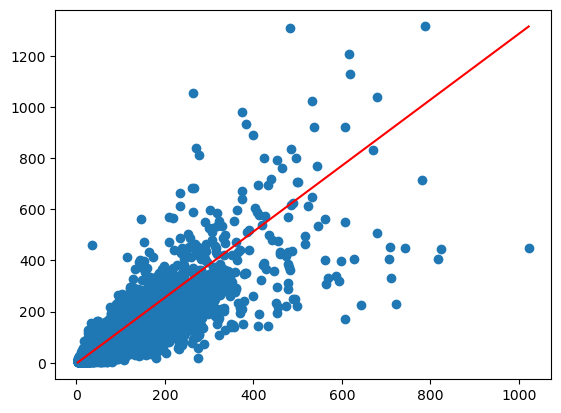

In [33]:
import numpy as np

import matplotlib.pyplot as plt

plt.scatter(y_pred, y_test)

plt.plot(np.linspace(y_pred.min(), y_pred.max()), np.linspace(y_test.min(), y_test.max()), color = 'red')

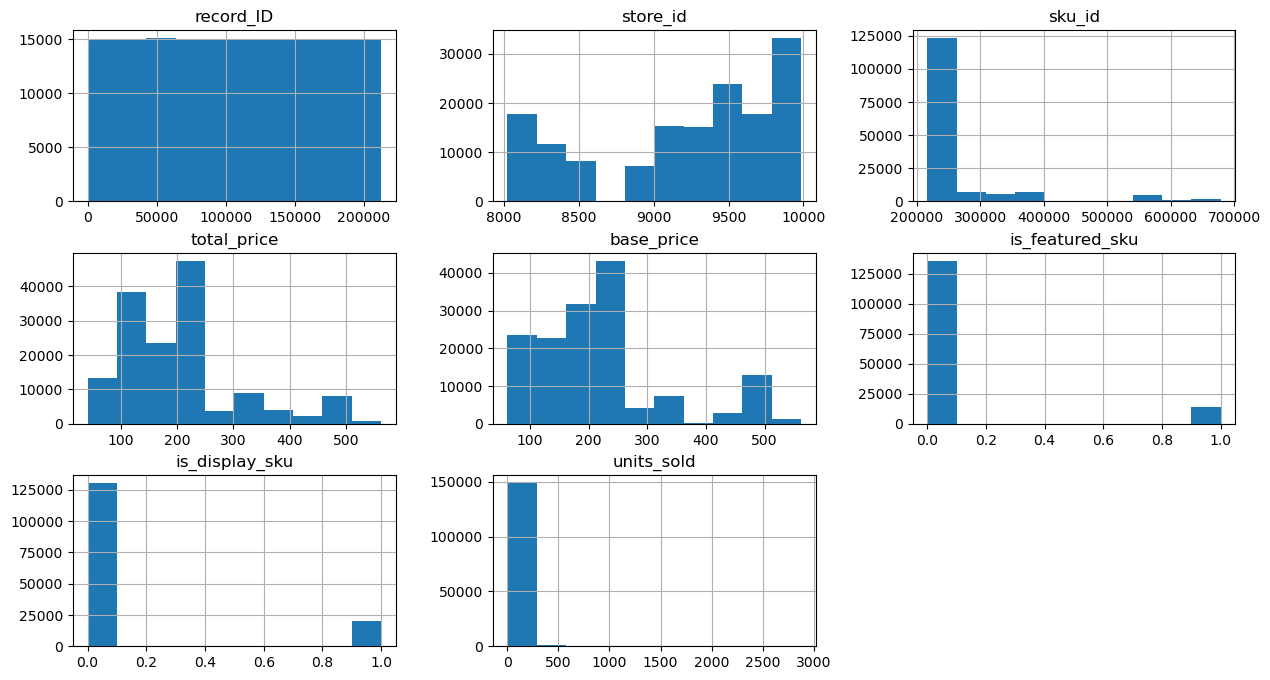

In [35]:
df.hist(figsize=(15, 8))
plt.show()

In [37]:
df = df.drop('record_ID', axis=1)

In [39]:
df

,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,day,month,year
0,8091,216418,99.0375,111.8625,0,0,20,17,01,11
1,8091,216419,99.0375,99.0375,0,0,28,17,01,11
2,8091,216425,133.9500,133.9500,0,0,19,17,01,11
3,8091,216233,133.9500,133.9500,0,0,44,17,01,11
4,8091,217390,141.0750,141.0750,0,0,52,17,01,11
...,...,...,...,...,...,...,...,...,...,...
150145,9984,223245,235.8375,235.8375,0,0,38,09,07,13
150146,9984,223153,235.8375,235.8375,0,0,30,09,07,13
150147,9984,245338,357.6750,483.7875,1,1,31,09,07,13
150148,9984,547934,141.7875,191.6625,0,1,12,09,07,13


In [41]:
len(df.store_id.unique())

76

In [43]:
len(df.sku_id.unique())

28

In [45]:
df.units_sold()

TypeError: 'Series' object is not callable

In [47]:
df.units_sold

0         20
1         28
2         19
3         44
4         52
          ..
150145    38
150146    30
150147    31
150148    12
150149    15
Name: units_sold, Length: 150150, dtype: int64

In [49]:
df.units_sold.describe()

count    150150.000000
mean         51.674206
std          60.207904
min           1.000000
25%          20.000000
50%          35.000000
75%          62.000000
max        2876.000000
Name: units_sold, dtype: float64

In [51]:
df.units_sold.quantile(0.99)

283.0

In [53]:
df = df[df.units_sold < df.units_sold.quantile(0.99)]

In [55]:
df

,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,day,month,year
0,8091,216418,99.0375,111.8625,0,0,20,17,01,11
1,8091,216419,99.0375,99.0375,0,0,28,17,01,11
2,8091,216425,133.9500,133.9500,0,0,19,17,01,11
3,8091,216233,133.9500,133.9500,0,0,44,17,01,11
4,8091,217390,141.0750,141.0750,0,0,52,17,01,11
...,...,...,...,...,...,...,...,...,...,...
150145,9984,223245,235.8375,235.8375,0,0,38,09,07,13
150146,9984,223153,235.8375,235.8375,0,0,30,09,07,13
150147,9984,245338,357.6750,483.7875,1,1,31,09,07,13
150148,9984,547934,141.7875,191.6625,0,1,12,09,07,13


In [57]:
df.hist

<bound method hist_frame of         store_id  sku_id  total_price  base_price  is_featured_sku  \
0           8091  216418      99.0375    111.8625                0   
1           8091  216419      99.0375     99.0375                0   
2           8091  216425     133.9500    133.9500                0   
3           8091  216233     133.9500    133.9500                0   
4           8091  217390     141.0750    141.0750                0   
...          ...     ...          ...         ...              ...   
150145      9984  223245     235.8375    235.8375                0   
150146      9984  223153     235.8375    235.8375                0   
150147      9984  245338     357.6750    483.7875                1   
150148      9984  547934     141.7875    191.6625                0   
150149      9984  679023     234.4125    234.4125                0   

        is_display_sku  units_sold day month year  
0                    0          20  17    01   11  
1                    0     

array([[<Axes: title={'center': 'store_id'}>,
        <Axes: title={'center': 'sku_id'}>,
        <Axes: title={'center': 'total_price'}>],
       [<Axes: title={'center': 'base_price'}>,
        <Axes: title={'center': 'is_featured_sku'}>,
        <Axes: title={'center': 'is_display_sku'}>],
       [<Axes: title={'center': 'units_sold'}>, <Axes: >, <Axes: >]],
      dtype=object)

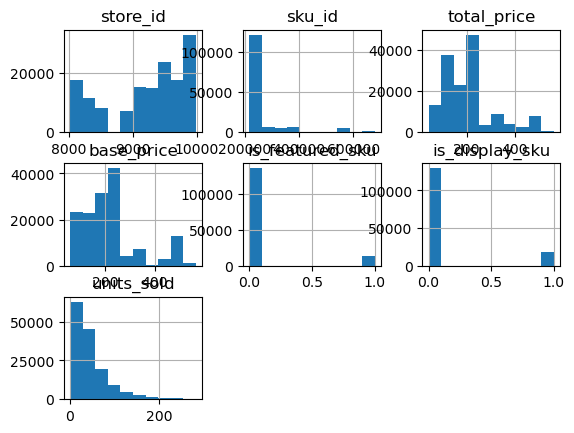

In [59]:
df.hist()

<Axes: >

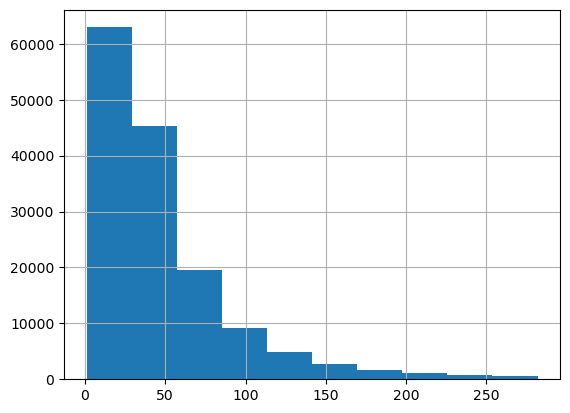

In [61]:
df.units_sold.hist()

<Axes: >

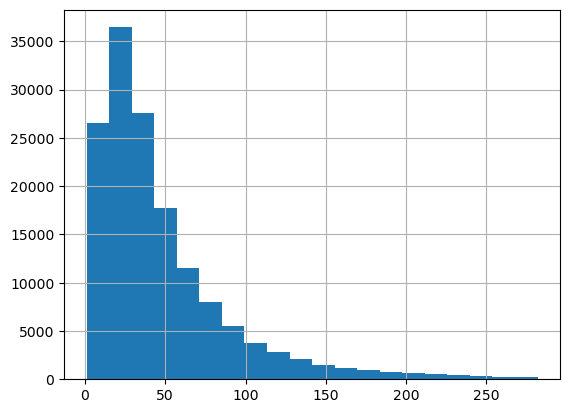

In [63]:
df.units_sold.hist(bins=20)

In [65]:
pd.get_dummies(df.store_id, prefix='store')

,store_8023,store_8058,store_8063,store_8091,store_8094,store_8095,store_8121,store_8218,store_8222,store_8317,...,store_9872,store_9876,store_9879,store_9880,store_9881,store_9890,store_9909,store_9954,store_9961,store_9984
0,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150145,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
150146,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
150147,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
150148,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [67]:
df.join(pd.get_dummies(df.store_id, prefix = 'store'))

,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,day,month,year,...,store_9872,store_9876,store_9879,store_9880,store_9881,store_9890,store_9909,store_9954,store_9961,store_9984
0,8091,216418,99.0375,111.8625,0,0,20,17,01,11,...,False,False,False,False,False,False,False,False,False,False
1,8091,216419,99.0375,99.0375,0,0,28,17,01,11,...,False,False,False,False,False,False,False,False,False,False
2,8091,216425,133.9500,133.9500,0,0,19,17,01,11,...,False,False,False,False,False,False,False,False,False,False
3,8091,216233,133.9500,133.9500,0,0,44,17,01,11,...,False,False,False,False,False,False,False,False,False,False
4,8091,217390,141.0750,141.0750,0,0,52,17,01,11,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150145,9984,223245,235.8375,235.8375,0,0,38,09,07,13,...,False,False,False,False,False,False,False,False,False,True
150146,9984,223153,235.8375,235.8375,0,0,30,09,07,13,...,False,False,False,False,False,False,False,False,False,True
150147,9984,245338,357.6750,483.7875,1,1,31,09,07,13,...,False,False,False,False,False,False,False,False,False,True
150148,9984,547934,141.7875,191.6625,0,1,12,09,07,13,...,False,False,False,False,False,False,False,False,False,True


In [69]:
df.join(pd.get_dummies(df.store_id, prefix = 'store')).drop('store_id', axis=1)

,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,day,month,year,store_8023,...,store_9872,store_9876,store_9879,store_9880,store_9881,store_9890,store_9909,store_9954,store_9961,store_9984
0,216418,99.0375,111.8625,0,0,20,17,01,11,False,...,False,False,False,False,False,False,False,False,False,False
1,216419,99.0375,99.0375,0,0,28,17,01,11,False,...,False,False,False,False,False,False,False,False,False,False
2,216425,133.9500,133.9500,0,0,19,17,01,11,False,...,False,False,False,False,False,False,False,False,False,False
3,216233,133.9500,133.9500,0,0,44,17,01,11,False,...,False,False,False,False,False,False,False,False,False,False
4,217390,141.0750,141.0750,0,0,52,17,01,11,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150145,223245,235.8375,235.8375,0,0,38,09,07,13,False,...,False,False,False,False,False,False,False,False,False,True
150146,223153,235.8375,235.8375,0,0,30,09,07,13,False,...,False,False,False,False,False,False,False,False,False,True
150147,245338,357.6750,483.7875,1,1,31,09,07,13,False,...,False,False,False,False,False,False,False,False,False,True
150148,547934,141.7875,191.6625,0,1,12,09,07,13,False,...,False,False,False,False,False,False,False,False,False,True


In [71]:
df = df.join(pd.get_dummies(df.store_id, prefix = 'store')).drop('store_id', axis=1)
df = df.join(pd.get_dummies(df.sku_id, prefix = 'item')).drop('sku_id', axis=1)

In [77]:
df

,total_price,base_price,is_featured_sku,is_display_sku,units_sold,day,month,year,store_8023,store_8058,...,item_320485,item_327492,item_378934,item_398721,item_545621,item_546789,item_547934,item_600934,item_673209,item_679023
0,99.0375,111.8625,0,0,20,17,01,11,False,False,...,False,False,False,False,False,False,False,False,False,False
1,99.0375,99.0375,0,0,28,17,01,11,False,False,...,False,False,False,False,False,False,False,False,False,False
2,133.9500,133.9500,0,0,19,17,01,11,False,False,...,False,False,False,False,False,False,False,False,False,False
3,133.9500,133.9500,0,0,44,17,01,11,False,False,...,False,False,False,False,False,False,False,False,False,False
4,141.0750,141.0750,0,0,52,17,01,11,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150145,235.8375,235.8375,0,0,38,09,07,13,False,False,...,False,False,False,False,False,False,False,False,False,False
150146,235.8375,235.8375,0,0,30,09,07,13,False,False,...,False,False,False,False,False,False,False,False,False,False
150147,357.6750,483.7875,1,1,31,09,07,13,False,False,...,False,False,False,False,False,False,False,False,False,False
150148,141.7875,191.6625,0,1,12,09,07,13,False,False,...,False,False,False,False,False,False,True,False,False,False


In [79]:
model = RandomForestRegressor(n_jobs=-1)

In [81]:
X, y = df.drop('units_sold', axis=1), df['units_sold']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [83]:
model.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1)

In [85]:
model.score(X_test, y_test)

0.8256537021442041

In [87]:
y_pred = model.predict(X_test)

In [89]:
rmse = root_mean_squared_error(y_pred, y_test)

rmse

17.823581091516406

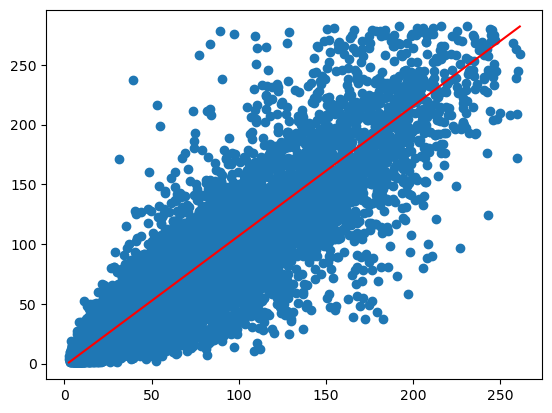

In [91]:
plt.scatter(y_pred, y_test)

plt.plot(np.linspace(y_pred.min(), y_pred.max()), np.linspace(y_test.min(), y_test.max()), color = 'red')

In [93]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [10, 20],
    'min_samples_split': [2,3]
}

model = RandomForestRegressor(n_jobs=-1)

grid_search = GridSearchCV(model, param_grid, verbose=2, cv=3)

grid_search.fit(X, y)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] END ...............min_samples_split=2, n_estimators=10; total time=   2.2s
[CV] END ...............min_samples_split=2, n_estimators=10; total time=   2.3s
[CV] END ...............min_samples_split=2, n_estimators=10; total time=   2.1s
[CV] END ...............min_samples_split=2, n_estimators=20; total time=   3.5s
[CV] END ...............min_samples_split=2, n_estimators=20; total time=   3.7s
[CV] END ...............min_samples_split=2, n_estimators=20; total time=   3.7s
[CV] END ...............min_samples_split=3, n_estimators=10; total time=   2.1s
[CV] END ...............min_samples_split=3, n_estimators=10; total time=   2.2s
[CV] END ...............min_samples_split=3, n_estimators=10; total time=   2.1s
[CV] END ...............min_samples_split=3, n_estimators=20; total time=   3.5s
[CV] END ...............min_samples_split=3, n_estimators=20; total time=   3.6s
[CV] END ...............min_samples_split=3, n_es

GridSearchCV(cv=3, estimator=RandomForestRegressor(n_jobs=-1),
             param_grid={'min_samples_split': [2, 3], 'n_estimators': [10, 20]},
             verbose=2)

In [95]:
best_model = grid_search.best_estimator_

In [97]:
grid_search.best_params_

{'min_samples_split': 2, 'n_estimators': 20}

In [99]:
best_model.score(X_test, y_test)

0.9728223946824629

In [101]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] END ...............min_samples_split=2, n_estimators=10; total time=   1.8s
[CV] END ...............min_samples_split=2, n_estimators=10; total time=   1.8s
[CV] END ...............min_samples_split=2, n_estimators=10; total time=   2.0s
[CV] END ...............min_samples_split=2, n_estimators=20; total time=   3.1s
[CV] END ...............min_samples_split=2, n_estimators=20; total time=   3.0s
[CV] END ...............min_samples_split=2, n_estimators=20; total time=   3.0s
[CV] END ...............min_samples_split=3, n_estimators=10; total time=   1.9s
[CV] END ...............min_samples_split=3, n_estimators=10; total time=   1.8s
[CV] END ...............min_samples_split=3, n_estimators=10; total time=   1.8s
[CV] END ...............min_samples_split=3, n_estimators=20; total time=   2.9s
[CV] END ...............min_samples_split=3, n_estimators=20; total time=   3.0s
[CV] END ...............min_samples_split=3, n_es

GridSearchCV(cv=3, estimator=RandomForestRegressor(n_jobs=-1),
             param_grid={'min_samples_split': [2, 3], 'n_estimators': [10, 20]},
             verbose=2)

In [103]:
best_model.score(X_test, y_test)

0.9728223946824629

In [105]:
best_model = grid_search.best_estimator_

In [107]:
grid_search.best_params_

{'min_samples_split': 3, 'n_estimators': 20}

In [109]:
best_model.score(X_test, y_test)

0.8220504077687129